### Week 7 & 8
### DSC 640
### Abed Tabbalat
### Python

In [83]:
# Library Imports
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
import squarify
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as tick
%matplotlib inline

In [52]:
# Settings
pd.set_option("display.max_rows", 10, "display.max_columns", 10)
plt.style.use('seaborn')
sns.set_style('whitegrid')

In [53]:
# Data import (crime rates)
df_crime = pd.read_csv('crimerates-by-state-2005.csv')
df_crime

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221
...,...,...,...,...,...,...,...,...,...
47,Virginia,6.1,22.7,99.2,154.8,392.1,2035.0,211.1,7563887
48,Washington,3.3,44.7,92.1,205.8,959.7,3149.5,783.9,6261282
49,West Virginia,4.4,17.7,44.6,206.1,621.2,1794.0,210.0,1803920
50,Wisconsin,3.5,20.6,82.2,135.2,440.8,1992.8,226.6,5541443


In [54]:
# Crime data types
df_crime.dtypes

state                   object
murder                 float64
forcible_rape          float64
robbery                float64
aggravated_assault     float64
burglary               float64
larceny_theft          float64
motor_vehicle_theft    float64
population               int64
dtype: object

In [55]:
# Crime data description
df_crime.describe().T

,count,mean,std,min,25%,50%,75%,max
murder,52.0,5.321154e+00,4.845913e+00,1.1,2.650,4.80,6.700,35.4
forcible_rape,52.0,3.369038e+01,1.116917e+01,13.9,26.375,32.55,39.950,81.1
robbery,52.0,1.144327e+02,9.696318e+01,7.4,67.400,98.95,152.350,672.1
aggravated_assault,52.0,2.698058e+02,1.449176e+02,61.7,153.450,237.35,361.850,721.3
burglary,52.0,6.911962e+02,2.315179e+02,311.9,493.600,669.30,921.350,1201.1
larceny_theft,52.0,2.303156e+03,5.096642e+02,1343.7,1895.525,2353.15,2698.975,3308.4
motor_vehicle_theft,52.0,3.838596e+02,2.495977e+02,102.0,222.725,322.95,421.275,1402.3
population,52.0,1.137512e+07,4.072533e+07,506242.0,1670256.250,4219246.00,6730745.000,295753151.0


In [56]:
# Melting columns to rows for vizualization
df_crime_m = df_crime.melt(id_vars=['state', 'population'], var_name='crime_type', value_name='crime_rate')
df_crime_m

,state,population,crime_type,crime_rate
0,United States,295753151,murder,5.6
1,Alabama,4545049,murder,8.2
2,Alaska,669488,murder,4.8
3,Arizona,5974834,murder,7.5
4,Arkansas,2776221,murder,6.7
...,...,...,...,...
359,Virginia,7563887,motor_vehicle_theft,211.1
360,Washington,6261282,motor_vehicle_theft,783.9
361,West Virginia,1803920,motor_vehicle_theft,210.0
362,Wisconsin,5541443,motor_vehicle_theft,226.6


In [57]:
# Data import (birth rate)
df_birth_rate_yearly = pd.read_csv('birth-rates-yearly.csv')
df_birth_rate_yearly

,year,rate
0,1960,36.400
1,1961,35.179
2,1962,33.863
3,1963,32.459
4,1964,30.994
...,...,...
9865,2004,30.123
9866,2005,30.067
9867,2006,30.027
9868,2007,29.987


In [58]:
# Birth rate data types
df_birth_rate_yearly.dtypes

year      int64
rate    float64
dtype: object

In [59]:
# Birth rate data description
df_birth_rate_yearly.describe().T

,count,mean,std,min,25%,50%,75%,max
year,9870.0,1985.170821,14.047334,1960.0,1973.000,1986.000,1997.00000,2008.0
rate,9870.0,29.935404,13.015935,6.9,18.063,29.615,41.90625,132.0


#### Scatter Plot

In [60]:
df_crime_m_xusa = df_crime_m[df_crime_m['state'] != 'United States']
df_crime_m_xusa

,state,population,crime_type,crime_rate
1,Alabama,4545049,murder,8.2
2,Alaska,669488,murder,4.8
3,Arizona,5974834,murder,7.5
4,Arkansas,2776221,murder,6.7
5,California,35795255,murder,6.9
...,...,...,...,...
359,Virginia,7563887,motor_vehicle_theft,211.1
360,Washington,6261282,motor_vehicle_theft,783.9
361,West Virginia,1803920,motor_vehicle_theft,210.0
362,Wisconsin,5541443,motor_vehicle_theft,226.6


Text(0.5, 1.0, 'Python - Scatter Plot\nCrime Rate By Type')

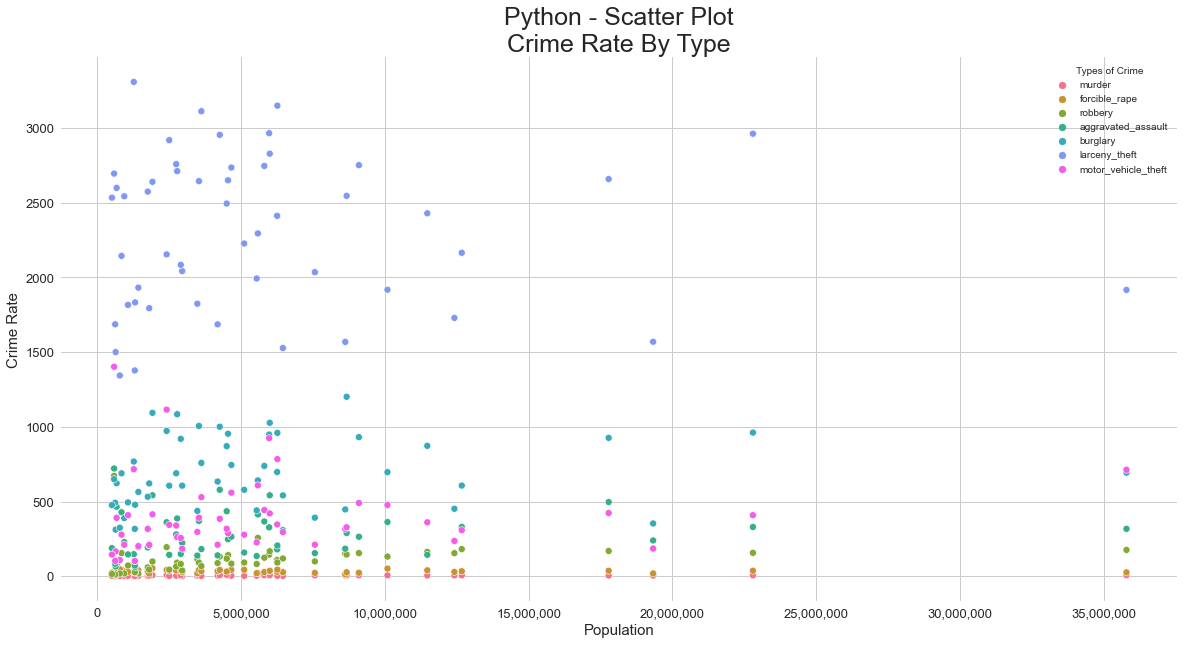

In [61]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot
sns.scatterplot(data=df_crime_m_xusa, x='population', y='crime_rate', hue='crime_type')

# Format
ax.get_xaxis().set_major_formatter(tick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel('Population', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Crime Rate', fontsize=15)
plt.yticks(fontsize=13)
ax.legend(loc='upper right', title = 'Types of Crime')
plt.title('Python - Scatter Plot\nCrime Rate By Type', fontsize=25)

#### Bubble Plot

In [62]:
df_crime_m_usa = df_crime_m[df_crime_m['state'] == 'United States']
df_crime_m_usa = df_crime_m_usa.sort_values(by=['crime_rate'])
df_crime_m_usa

,state,population,crime_type,crime_rate
0,United States,295753151,murder,5.6
52,United States,295753151,forcible_rape,31.7
104,United States,295753151,robbery,140.7
156,United States,295753151,aggravated_assault,291.1
312,United States,295753151,motor_vehicle_theft,416.7
208,United States,295753151,burglary,726.7
260,United States,295753151,larceny_theft,2286.3


Text(0.5, 1.0, 'Python - Bubble Chart\nCrime Types in the US')

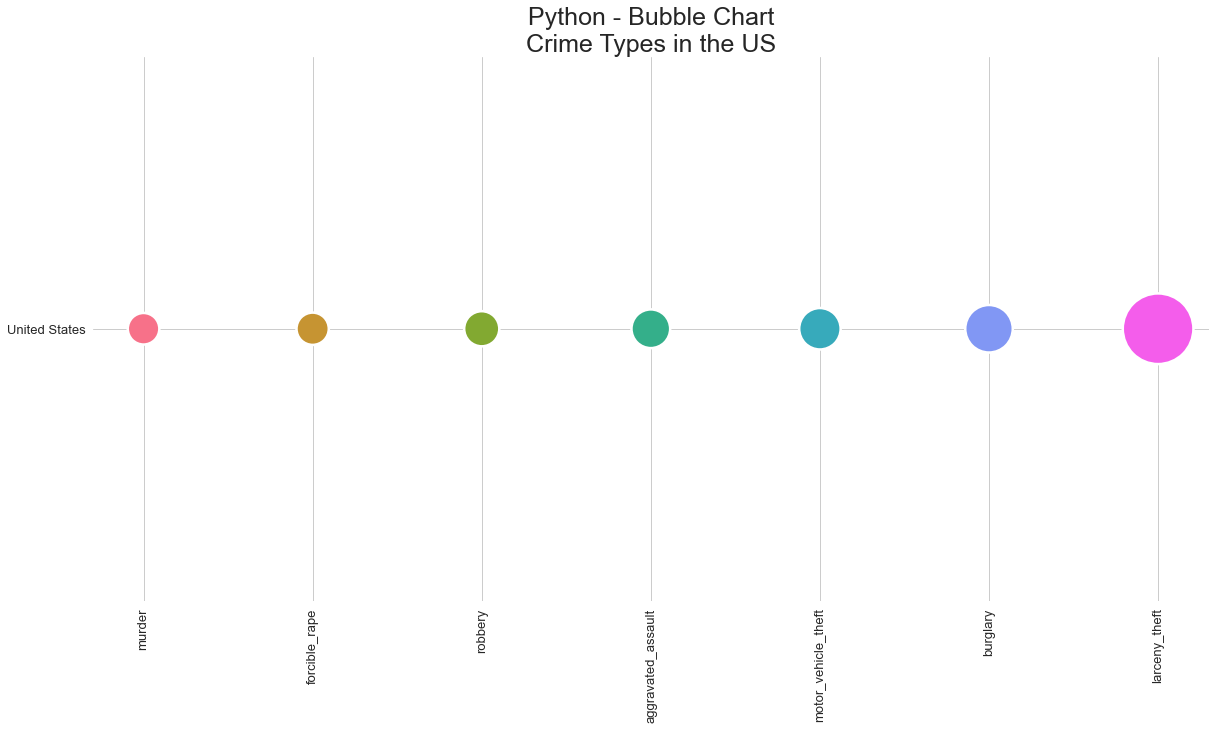

In [82]:
fig, ax = plt.subplots(figsize=(20, 10))

# Plot
sns.scatterplot(data=df_crime_m_usa, x='crime_type', y='state',size='crime_rate', sizes=(1000, 5000), hue='crime_type')

# Format
plt.xlabel(None, fontsize=15)
plt.xticks(fontsize=13, rotation=90)
plt.ylabel(None, fontsize=15)
plt.yticks(fontsize=13)
ax.get_legend().remove()
plt.title('Python - Bubble Chart\nCrime Types in the US', fontsize=25)

#### Density Plot

In [85]:
# Applying filters to show only the years 1965 and 2000
df_birth_rate_1965 = df_birth_rate_yearly[df_birth_rate_yearly['year'] == 1965]
df_birth_rate_1965

,year,rate
5,1965,29.513
54,1965,52.168
103,1965,53.836
152,1965,37.008
201,1965,25.518
...,...,...
9630,1965,44.558
9679,1965,54.914
9728,1965,39.883
9777,1965,49.061


In [88]:
# Applying filters to show only the years 1965 and 2000
df_birth_rate_2000 = df_birth_rate_yearly[df_birth_rate_yearly['year'] == 2000]
df_birth_rate_2000

,year,rate
40,2000,14.528
89,2000,50.903
138,2000,48.355
187,2000,16.850
236,2000,15.412
...,...,...
9665,2000,31.113
9714,2000,40.407
9763,2000,24.684
9812,2000,45.010


Text(0.5, 1.0, 'Python - Density Plot\nBirth Rate 1965 vs 2000')

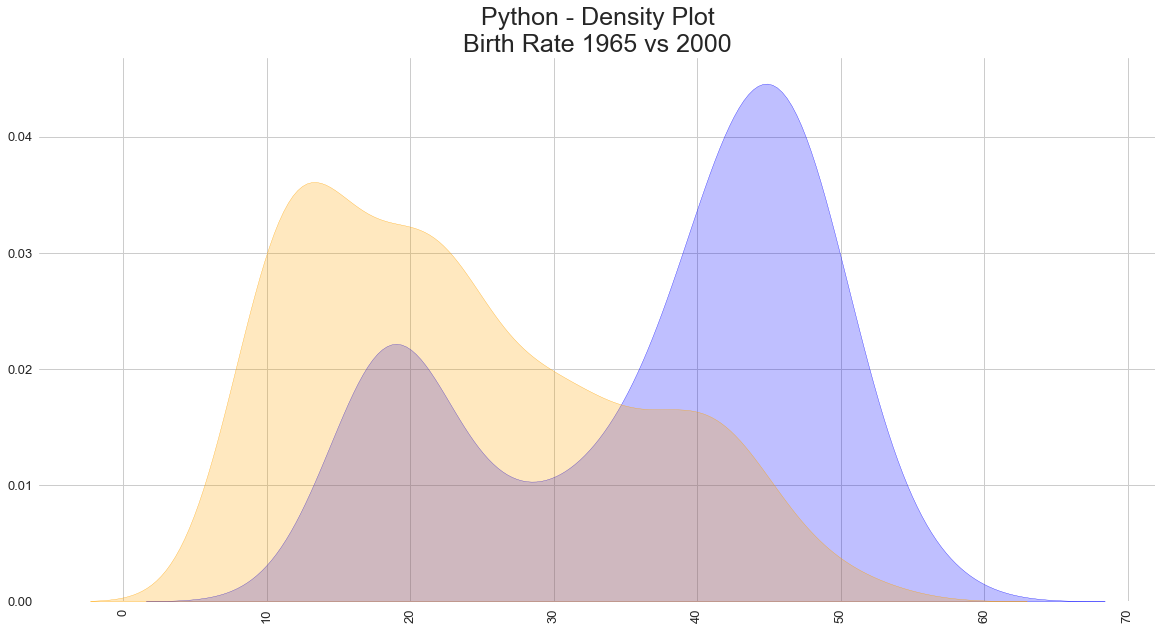

In [97]:
fig, ax = plt.subplots(figsize=(20, 10))
# Plot
sns.kdeplot(df_birth_rate_1965['rate'], bw_method=0.3, color='blue', fill=True)
sns.kdeplot(df_birth_rate_2000['rate'], bw_method=0.3, color='orange', fill=True)
# Format
plt.xlabel(None, fontsize=15)
plt.xticks(fontsize=13, rotation=90)
plt.ylabel(None, fontsize=15)
plt.yticks(fontsize=13)
plt.title('Python - Density Plot\nBirth Rate 1965 vs 2000', fontsize=25)